### 【 펭귄 데이터 분석 및 인사이트 도출 】
- 과제 주제 : PalmerPenguins 데이터를 활용한 종별 신체 특성 분석 및 환경 요인 인사이트 도출
- 과제 목표 :
1. palmerpenguins 데이터를 활용하여 펭귄의 종(species), 섬(island), 성별(sex)에 따른 신체 특성 차이를 분석
             
2. 수치형 변수 간 관계 탐색 및 시각화 진행으로 의미 있는 패턴 발견
             
3. 데이터 전처리 → 탐색 → 분석 → 인사이트 도출까지 전 과정을 실습

[과제 실행할 순서]

1. 종에 따른 신체 특성 그래프
2. 섬에 따른 신체 특성 그래프
3. 성별에 따른 신체 특성 그래프

--> 이 안에서 또 각각의 종, 섬, 성별을 합했을 때 특성 그래프 비교해보기

[1] 모듈 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

[2] 데이터 불러오기

In [ ]:
## 펭귄 데이터 불러와서 데이터프레임으로 출력
DATA_FILE = '../EXAM_DATA/penguins.csv'
df = pd.read_csv(DATA_FILE)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
## 각 데이터에서 신체 정보에 대한 정보는 다음과 같은 의미를 가진다.
# bill_length_mm = 부리 길이(mm)
# bill_depth_mm = 부리의 깊이(두께)(mm)
# filpper_length_mm = 물갈퀴 길이(mm)
# body_mass_g = 몸무게

[3] 데이터 전처리

In [ ]:
## 결측치 확인
df.isnull().sum()  ## -> 결측치 존재 (특히 성별 관련 결측치가 11개 이므로 성별에 따른 신체 특성 차이 출력할 때 고려해야할듯)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
## 전반적인 데이터 정보 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
## 전반적인 데이터 값 확인
df.describe(include='all')      ## 이상치 같은 건 존재하지 않는 것으로 보임

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [18]:
## 결측치 행들 처리하기
# bill_length_mm        2
# bill_depth_mm         2
# flipper_length_mm     2
# body_mass_g           2
# sex                  11
# => 여기서 sex가 없는 행들은 신체 특성 값도 존재하지 않고, 또 결측치가 있는 데이터가 전체 데이터의 5프로 정도 밖에 안 되기에 그냥 전체 버리기

df = df.dropna()
df.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

[4] 데이터 시각화

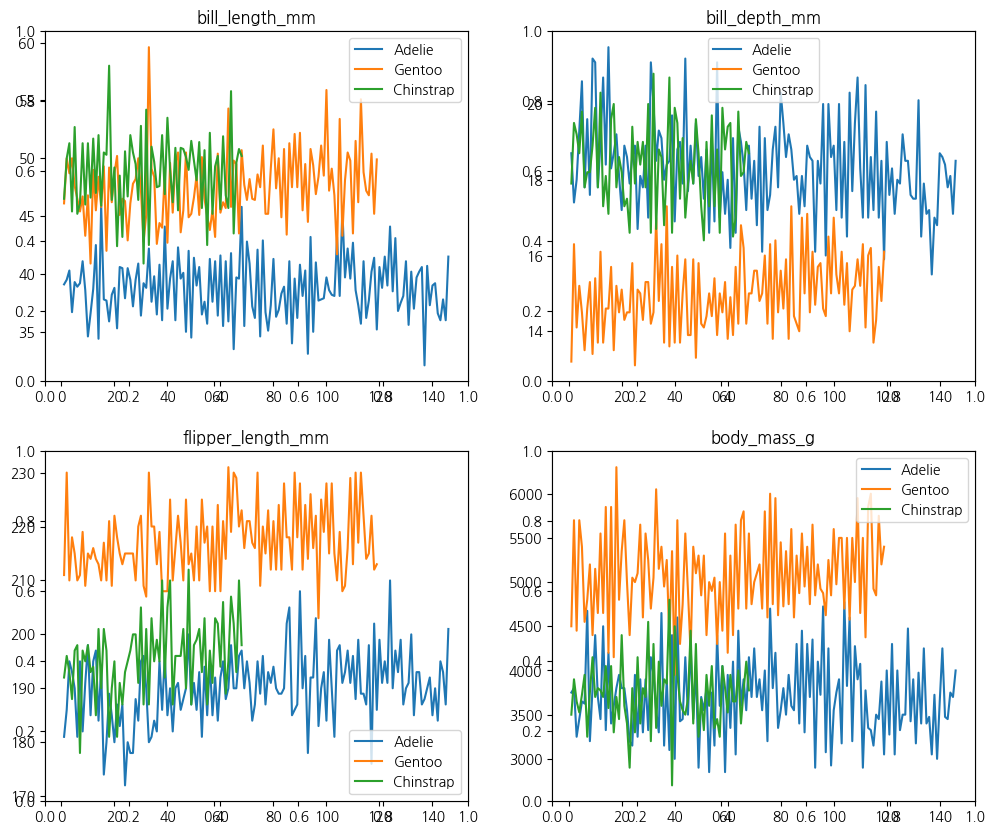

In [ ]:
## 1. 종에 따른 신체 특성 그래프 그리기
##    => x축은 각 종의 동물 인덱스 번호, y축은 신체 특성의 값
##    => 여기서 신체 특성이 4가지 있으므로 subplot으로 2행2열 나눠서 4가지 다 종별로 표현해보기

## 먼저 종 종류 확인
df['species'].unique()
# => ['Adelie', 'Gentoo', 'Chinstrap'] 출력 확인

## 각 종 별로 마스크 만들어서 확인해보기
mask1 = df['species'] == 'Adelie'
mask2 = df['species'] == 'Gentoo'
mask3 = df['species'] == 'Chinstrap'
df_A = df[mask1]
df_B = df[mask2]
df_C = df[mask3]

df_A.index = range(1, len(df_A)+1)
df_B.index = range(1, len(df_B)+1)
df_C.index = range(1, len(df_C)+1)

fig, axes = plt.subplots(2,2,figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df_A.index, df_A['bill_length_mm'])
ax1.plot(df_B.index, df_B['bill_length_mm'])
ax1.plot(df_C.index, df_C['bill_length_mm'])
ax1.set_title('bill_length_mm')
ax1.legend(['Adelie', 'Gentoo', 'Chinstrap'])


ax2.plot(df_A.index, df_A['bill_depth_mm'])
ax2.plot(df_B.index, df_B['bill_depth_mm'])
ax2.plot(df_C.index, df_C['bill_depth_mm'])
ax2.set_title('bill_depth_mm')
ax2.legend(['Adelie', 'Gentoo', 'Chinstrap'])

ax3.plot(df_A.index, df_A['flipper_length_mm'])
ax3.plot(df_B.index, df_B['flipper_length_mm'])
ax3.plot(df_C.index, df_C['flipper_length_mm'])
ax3.set_title('flipper_length_mm')
ax3.legend(['Adelie', 'Gentoo', 'Chinstrap'])

ax4.plot(df_A.index, df_A['body_mass_g'])
ax4.plot(df_B.index, df_B['body_mass_g'])
ax4.plot(df_C.index, df_C['body_mass_g'])
ax4.set_title('body_mass_g')
ax4.legend(['Adelie', 'Gentoo', 'Chinstrap'])

### 【 종 별로 신체 특성 결과 분석 】

- bill_length_mm    : Adelie 종이 비교적 작은 값을 가지고 있고, 나머지는 비슷한 값을 보여준다. (Adelie < Gentoo = Chinstrap)
- bill_depth_mm     : Gentoo 종이 비교적 작은 값을 가지고 있고, 나머지는 비슷한 값을 보여준다. (Gentoo < Adelie = Gentoo)
- flipper_length_mm : Gentoo 종이 가장 큰 값을, Chinstrap이 Adelie보다 약간 더 큰 값을 가지고 있다. (Adelie <= Chinstrap << Gentoo)
- body_mass_g       : Gentoo 종이 비교적 큰 값을 가지고 있고, 나머지는 비슷한 값을 보여준다. (Adelie = Chinstrap << Gentoo)

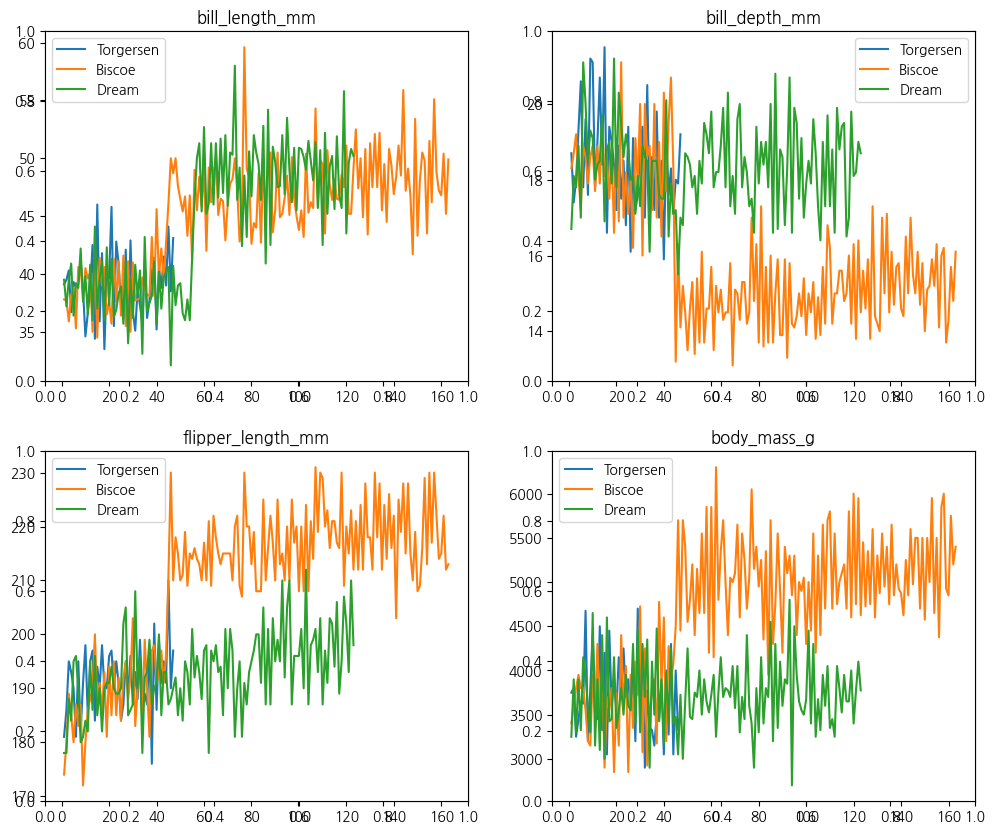

In [65]:
## 2. 섬에 따른 신체 특성 그래프 그리기
##    => x축은 각 섬에 사는 동물의 인덱스 번호, y축은 신체 특성의 값
##    => 여기서 신체 특성이 4가지 있으므로 subplot으로 2행2열 나눠서 4가지 다 종별로 표현해보기

## 먼저 섬 종류 확인
df['island'].unique()
# => ['Torgersen', 'Biscoe', 'Dream'] 출력 확인

# 각 종 별로 마스크 만들어서 확인해보기
mask1 = df['island'] == 'Torgersen'
mask2 = df['island'] == 'Biscoe'
mask3 = df['island'] == 'Dream'
df_A = df[mask1]
df_B = df[mask2]
df_C = df[mask3]

df_A.index = range(1, len(df_A)+1)
df_B.index = range(1, len(df_B)+1)
df_C.index = range(1, len(df_C)+1)

fig, axes = plt.subplots(2,2,figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df_A.index, df_A['bill_length_mm'])
ax1.plot(df_B.index, df_B['bill_length_mm'])
ax1.plot(df_C.index, df_C['bill_length_mm'])
ax1.set_title('bill_length_mm')
ax1.legend(['Torgersen', 'Biscoe', 'Dream'])


ax2.plot(df_A.index, df_A['bill_depth_mm'])
ax2.plot(df_B.index, df_B['bill_depth_mm'])
ax2.plot(df_C.index, df_C['bill_depth_mm'])
ax2.set_title('bill_depth_mm')
ax2.legend(['Torgersen', 'Biscoe', 'Dream'])

ax3.plot(df_A.index, df_A['flipper_length_mm'])
ax3.plot(df_B.index, df_B['flipper_length_mm'])
ax3.plot(df_C.index, df_C['flipper_length_mm'])
ax3.set_title('flipper_length_mm')
ax3.legend(['Torgersen', 'Biscoe', 'Dream'])

ax4.plot(df_A.index, df_A['body_mass_g'])
ax4.plot(df_B.index, df_B['body_mass_g'])
ax4.plot(df_C.index, df_C['body_mass_g'])
ax4.set_title('body_mass_g')
ax4.legend(['Torgersen', 'Biscoe', 'Dream'])

### 【 섬 별로 신체 특성 결과 분석 】 (Torgersen 데이터가 비교적 적었음 => 비교 힘듦)

- bill_length_mm    : 3개의 그래프가 비교적 비슷한 추세를 가지고 있음을 볼 수 있었다.
- bill_depth_mm     : 초반의 그래프가 비슷하다가, 뒤에 Biscoe가 Dream보다 작아지는 그래프를 볼 수 있다. (Biscoe < Dream)
- flipper_length_mm : 초반의 그래프가 비슷하다가, 뒤에 Biscoe가 Dream보다 커지는 그래프를 볼 수 있다. (Biscoe > Dream)
- body_mass_g       : 초반의 그래프가 비슷하다가, 뒤에 Biscoe가 Dream보다 커지는 그래프를 볼 수 있다. (Biscoe > Dream)

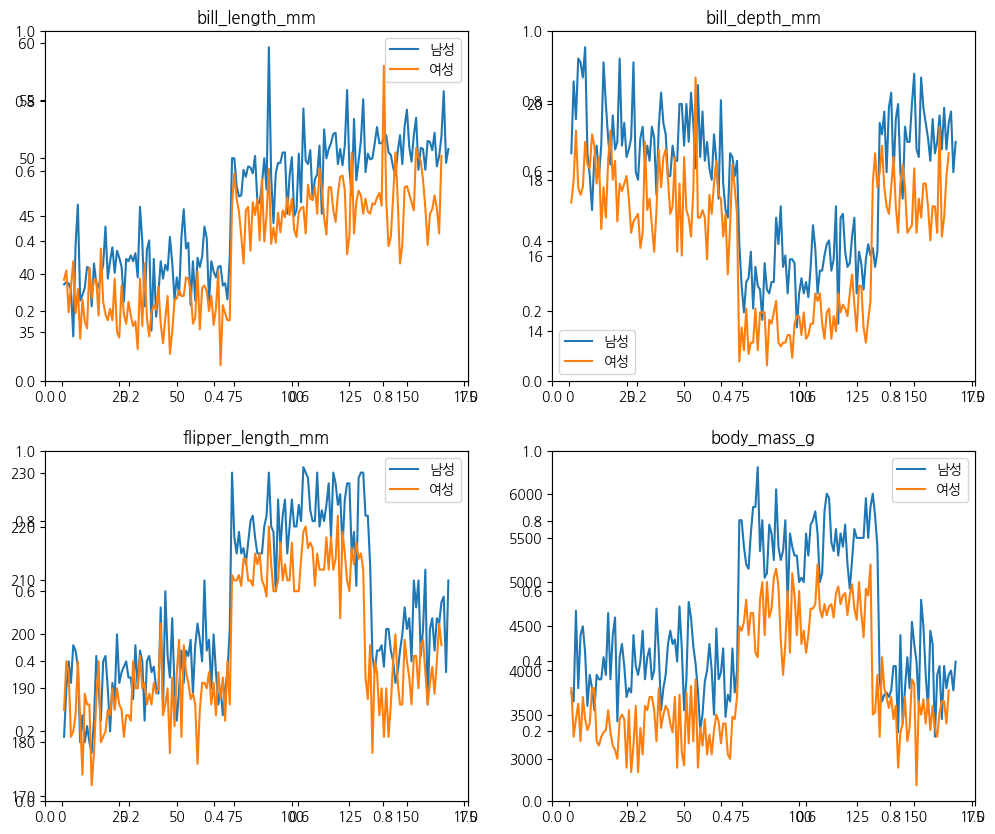

In [67]:
## 3. 성별에 따른 신체 특성 그래프 그리기
##    => x축은 각 성별에 따른 동물의 인덱스 번호, y축은 신체 특성의 값
##    => 여기서 신체 특성이 4가지 있으므로 subplot으로 2행2열 나눠서 4가지 다 종별로 표현해보기

## 먼저 성별 종류 확인
df['sex'].unique()
# => ['male', 'female'] 출력 확인

# 각 종 별로 마스크 만들어서 확인해보기
mask1 = df['sex'] == 'male'
mask2 = df['sex'] == 'female'
df_A = df[mask1]
df_B = df[mask2]

df_A.index = range(1, len(df_A)+1)
df_B.index = range(1, len(df_B)+1)

fig, axes = plt.subplots(2,2,figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df_A.index, df_A['bill_length_mm'])
ax1.plot(df_B.index, df_B['bill_length_mm'])
ax1.set_title('bill_length_mm')
ax1.legend(['남성', '여성'])


ax2.plot(df_A.index, df_A['bill_depth_mm'])
ax2.plot(df_B.index, df_B['bill_depth_mm'])
ax2.set_title('bill_depth_mm')
ax2.legend(['남성', '여성'])

ax3.plot(df_A.index, df_A['flipper_length_mm'])
ax3.plot(df_B.index, df_B['flipper_length_mm'])
ax3.set_title('flipper_length_mm')
ax3.legend(['남성', '여성'])

ax4.plot(df_A.index, df_A['body_mass_g'])
ax4.plot(df_B.index, df_B['body_mass_g'])
ax4.set_title('body_mass_g')
ax4.legend(['남성', '여성'])

### 【 성별 별로 신체 특성 결과 분석 】

- bill_length_mm    : 여성 << 남성
- bill_depth_mm     : 여성 << 남성
- flipper_length_mm : 여성 << 남성
- body_mass_g       : 여성 << 남성

=> 전체적으로 남성이 여성보다 비교적 더 큰 신체 특성을 갖고 있는 것을 확인할 수 있었다.

### [ 추가적인 생각 ]

==> 성별 같은 경우엔 데이터의 수가 비슷해서 두 그래프를 보며 비교하기 쉬웠지만, 종과 섬 같은 경우엔 데이터끼리 개수의 차이가 있어서 비교가 애매했다.

==> 따라서 종과 섬은 각 데이터의 평균치를 낸 후에, 각 값을 막대그래프나 파이그래프로 나타내면 비교하기 더욱 좋을 것 같다고 생각하였다.

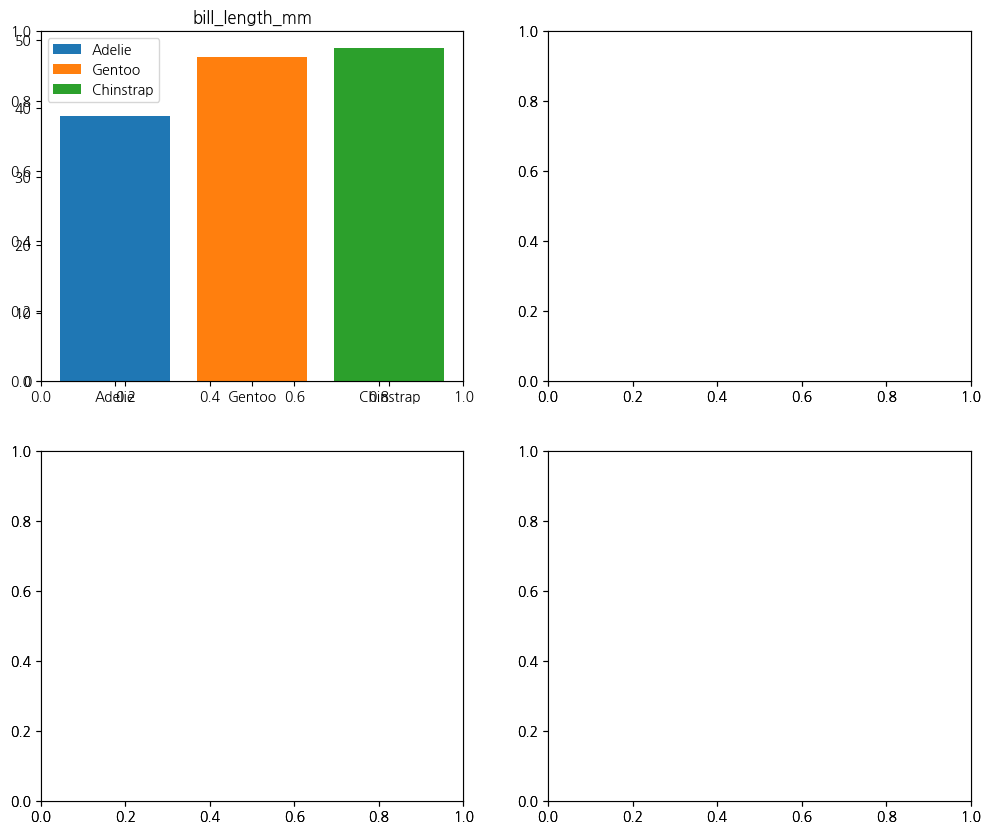

In [70]:
## 1. 종에 따른 신체 특성 그래프 그리기
##    => x축은 각 종의 동물 인덱스 번호, y축은 신체 특성의 값
##    => 여기서 신체 특성이 4가지 있으므로 subplot으로 2행2열 나눠서 4가지 다 종별로 표현해보기

## 먼저 종 종류 확인
df['species'].unique()
# => ['Adelie', 'Gentoo', 'Chinstrap'] 출력 확인

## 각 종 별로 마스크 만들어서 확인해보기
mask1 = df['species'] == 'Adelie'
mask2 = df['species'] == 'Gentoo'
mask3 = df['species'] == 'Chinstrap'
df_A = df[mask1]
df_B = df[mask2]
df_C = df[mask3]

df_A.index = range(1, len(df_A)+1)
df_B.index = range(1, len(df_B)+1)
df_C.index = range(1, len(df_C)+1)

fig, axes = plt.subplots(2,2,figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar('Adelie', df_A['bill_length_mm'].mean())
ax1.bar('Gentoo', df_B['bill_length_mm'].mean())
ax1.bar('Chinstrap', df_C['bill_length_mm'].mean())
ax1.set_title('bill_length_mm')
ax1.legend(['Adelie', 'Gentoo', 'Chinstrap'])


# ax2.plot(df_A.index, df_A['bill_depth_mm'])
# ax2.plot(df_B.index, df_B['bill_depth_mm'])
# ax2.plot(df_C.index, df_C['bill_depth_mm'])
# ax2.set_title('bill_depth_mm')
# ax2.legend(['Adelie', 'Gentoo', 'Chinstrap'])

# ax3.plot(df_A.index, df_A['flipper_length_mm'])
# ax3.plot(df_B.index, df_B['flipper_length_mm'])
# ax3.plot(df_C.index, df_C['flipper_length_mm'])
# ax3.set_title('flipper_length_mm')
# ax3.legend(['Adelie', 'Gentoo', 'Chinstrap'])

# ax4.plot(df_A.index, df_A['body_mass_g'])
# ax4.plot(df_B.index, df_B['body_mass_g'])
# ax4.plot(df_C.index, df_C['body_mass_g'])
# ax4.set_title('body_mass_g')
# ax4.legend(['Adelie', 'Gentoo', 'Chinstrap'])